# Dirbtiniai neuroniniai tinklai

- Dirbtiniai neuroniniai tinklai (angl. artificial neural networks, ANNs) yra MM modelių klasė, įkvėpta smegenų neuronų architektūra. 

- Dirbtiniai neuroniniai tinklai egzistuoja jau gana seniai – pirmą kartą juos 1943 m. pristatė neurofiziologas Warrenas McCullochas ir matematikas Walteris Pittsas. Jie buvo sukurti kaip būdas aproksimuoti sudėtingas funkcijas, neturinčias aiškios išreikštinės formos.

- Dirbtinius neuroninius tinklus sudaro sujungti mazgai, vadinami dirbtiniais neuronais. Juos jungia briaunos, atitinkančios smegenų sinapses. Kiekvienas dirbtinis neuronas gauna signalus iš prieš jį esančių neuronų, tada juos apdoroja ir siunčia signalą toliau kitiems neuronams. Signalas yra realusis skaičius, o kiekvieno neurono išvestis apskaičiuojama pagal tam tikrą taisyklę. Signalo stiprumą kiekviename ryšyje lemia svoris, dažniausiai pavaizduotas ant briaunos.

<hr style="border: none; height: 2px; background-color: black;">

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/real_neuron.png" alt="real-neuron" width="65%">
<p><strong>1.8 pav., Biologinis neuronas </strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">

- Dirbtiniai neuroniniai tinklai taikomi tiek regresijos, tiek klasifikavimo uždaviniuose.

## Matematinė formuluotė 

Tegul $x = (x_1, \ldots, x_d) \in \mathbb{R}^{d_0}$. Dirbtinis neuroninis tinklas $h^L : \mathbb{R}^{d_0} \rightarrow \mathbb{R}^d$ [čia $d = d_L$] apibrėžiamas kaip funkcijų $ h^l = (h_1^l, \ldots, h_{d_l}^l): \mathbb{R}^{d_{l-1}} \rightarrow \mathbb{R}^{d_l}, \text{ } l = 1, \ldots, L $ kompozicija, kur $h^l$ komponentės užrašomos

$$
h_j^1(x) = \sum_{i=1}^{d_0} w_{ij}^1 x_i + b_j^1, \quad j = 1, \ldots, d_1
$$

$$
h_j^l(x) = \sum_{i=1}^{d_{l-1}} w_{ij}^l \sigma(h_i^{l-1}(x)) + b_j^l, \quad j = 1, \ldots, d_l \quad l = 2, \ldots, L
$$

- Čia $L$ žymi dirbtinio neuroninio tinklo *sluoksnių skaičių*. 
- Kiekvienas sluoksnis $l = 1, \ldots, L$ turi $d_l$ dirbtinių neuronų, $W := \max_{1 \leq l \leq L} d_l$ žymi neuroninio tinklo *plotį*. 
- Koeficientai $w_{ij}^l$ atitinka *svorius*, kurie jungia $i$-ąjį neuroną $(l-1)$-ajame sluoksnyje su $j$-uoju neuronu $l$-ajame sluoksnyje; $b_j^l$ yra $j$-ojo neurono $l$-ajame sluoksnyje *laisvasis narys*. 
- Funkcija $\sigma$, istoriškai vadinama *aktyvacijos funkcija*, yra žinoma ir fiksuota, tuo tarpu koeficientai $w_{ij}^l$ ir laisvasis narys $b_j^l$ – nežinomi. 

- MM kontekste, paskutinio sluoksnio išvestis, žymima $h^L$, yra hipotezės funkcija. Visų dirbtinio neuroninio tinklo svorių ir laisvųjų narių rinkinys vadinamas tinklo *parametrais* $\theta$. Ši parametrų aibė apibrėžia dirbtinio neuroninio tinklo architektūrą, todėl žymėsime $h^L(x) = h^L(x; \theta)$.

Pažymėkime apmokymo aibę $D = \{ (x^i, y^i) \mid i = 1, \ldots, N\}$. Tam, kad galėtume kiekybiškai įvertinti nuostolį vienai stebinio reikšmei $(x^i, y^i)$, įvedama nuostolių funkcija $\ell$. Norint, kad $h^L$ artinys būtų geras visoje aibėje $D$, įvedama empirinės rizikos funkcija:

$$
    R_{emp}(h^L) = \frac{1}{N} \sum_{i=1}^{N} \ell\left( (x^i, y^i), h^L(x^i;\theta) \right).
$$

- Dalykai jau pažįstami iš anksčiau :)

*pastaba:* literatūroje empirinės rizikos funkcija dažniausiai vadinama tiesiog netiktimi, sutapatinant du terminus į vieną.

### Netikties funkcijos

- Priklausomai nuo to, kokią netikties (empirinės rizikos) funkciją parinksime, pagal tai bus formuluojamas atitinkamas optimizavimo uždavinys. Netikties funkcijos pasirinkimas priklauso nuo problemos tipo. Pvz., regresijos užduotims dažniausiai naudojama kvadratinė netiktis, o klasifikavimo užduotims – logaritminė arba kryžminės entropijos netiktis. 


##### 1. **Kvadratinė netiktis (angl. Mean Squared Error, MSE)**

Kvadratinė netiktis dažniausiai naudojama regresijos užduotims spręsti. Ši funkcija skaičiuoja skirtumo tarp tikrosios reikšmės $y^i$ ir modelio prognozės $h^L(x^i;\theta)$ kvadratą:

$$
\ell_{\text{MSE}}\left((x^i, y^i), h^L(x^i;\theta)\right) = \left(y^i - h^L(x^i;\theta)\right)^2.
$$

Empirinė rizika tokiu atveju bus:

$$
R_{\text{emp}}(h^L) = \frac{1}{N} \sum_{i=1}^{N} \left(y^i - h^L(x^i;\theta)\right)^2.
$$


##### 2. **Logaritminė netiktis (angl. Log Loss)**

Logaritminė netiktis dažniausiai naudojama binarinės klasifikacijos uždaviniuose, kai modelis siekia nustatyti tikimybę, jog pavyzdys priklauso tam tikrai klasei:

$$
\ell_{\text{log}}\left((x^i, y^i), h^L(x^i;\theta)\right) = - \left[ y^i \log h^L(x^i;\theta) + (1 - y^i) \log \left(1 - h^L(x^i;\theta)\right) \right].
$$

Empirinė rizika tokiu atveju bus:

$$
R_{\text{emp}}(h^L) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y^i \log h^L(x^i;\theta) + (1 - y^i) \log \left(1 - h^L(x^i;\theta)\right) \right].
$$


##### 3. **Kryžminės entropijos netiktis (angl. Cross-Entropy Loss)**

Kryžminė entropija yra bendresnis logaritminės netikties atvejis, naudojamas daugiaklasėje klasifikacijoje. Jei turime $K$ klasių, kryžminės entropijos netiktis apibrėžiama taip:

$$
\ell_{\text{CE}}\left((x^i, y^i), h^L(x^i;\theta)\right) = - \sum_{k=1}^{K} y_k^i \log h_k^L(x^i;\theta),
$$

kur $y_k^i$ yra reikšmė, nurodanti tikrąją klasę, o $h_k^L(x^i;\theta)$ yra modelio prognozuota tikimybė klasei $k$.

Empirinė rizika tokiu atveju bus:

$$
R_{\text{emp}}(h^L) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_k^i \log h_k^L(x^i;\theta).
$$

## Aktyvacijos funkcija

- Aktyvacijos funkcija žaidžia esminę rolę dirbtinio neuroninio tinklo architektūroje. Iš tiesų, jeigu jos nebūtų (t.y., jei $\sigma(t) = t$), tada nesvarbu kokio gylio neuroninį tinklą bekonstruosime, galutinė išraiška galės būti supaprastinta į tiesinį modelį. Aktyvacijos funkcija įveda netiesiškumo – tai leidžia modeliuoti žymiai sudėtingesnius reiškinius. 

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/activation_functions.jpg" alt="activation-functions" width="65%">
<p><strong>1.11 pav., Dažniausiai naudojamos aktyvacijos funkcijos </strong></p>
</div>



- Puikus puslapis, parodantis aktyvacijos funkcijos svarbą ir daug kitų aspektų: [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.13358&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


### Teoriniai rezulatatai

- Aktyvacijos funkcijos svarbą pagrindžia ir kai kurie teoriniai rezultatai. Vieni pirmų teorinių rezultatų buvo atrasti austrų matematiko K. Hortnik 1989 m. Kiek vėliau, jo darbai buvo apibendrinti, įrodant teoremą, teigiančią, kad kiekvienai tolydžiai funkcijai egzistuoja dirbtinis neuroninis tinklas, gebantis aproksimuoti ją norimu tikslumu tada ir tik tada, kai aktyvacijos funkcija nėra daugianaris. 

- Labai įdomu – neuroninio tinklo idėja buvo suformuluota nemąstant iš matematinės pusės :)

- Teoremos nenurodo apmokymo būdo, jos nurodo tik egzistavimą.

## Tinklo apmokymo intuicija

- Dirbtinis neuroninis tinklas – sudėtinga paprastų funkcijų kompozicija.

- Empirinės rizikos funkcija (netiktis) – matas, kaip gerai ar blogai modelis prognozuoja.

- Svoriai ir laisvieji nariai – modelio parametrai, kuriuos galime reguliuoti.

- Netikties funkcijos gradientas pagal kiekvieną parametrą mums nurodo, ar to parametro pokytis padidins, ar pamažins netiktį.

Apibrėžkime nesudėtingą dviejų sluoksnių dirbtinį neuroninį tinklą:
$$
    h_n(x) = \sum_{j=1}^{n} w_{j} \sigma\left(\sum_{i=1}^{d} w_{ij} x_i + b_j\right) + b.
$$

In [1]:
import numpy as np

def two_layer_nn(X, W1, b1, W2, b2, activation):

    z1 = np.dot(X, W1.T) + b1   # Shape (m, n)
    a1 = activation(z1)         # Shape (m, n)
    z2 = np.dot(a1, W2) + b2    # Shape (m,)
    
    return z2

In [2]:
def identity(x):
    return x

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

x_seq = np.linspace(-3, 3, 100).reshape(-1, 1)
y_seq = np.sin(x_seq) + np.random.normal(0, 0.25, 100).reshape(-1, 1)

In [3]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np

app = Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#f9f9f9', 'padding': '20px', 'max-width': '800px', 'margin': '0 auto', 'font-family': 'Arial, sans-serif'}, children=[
        dcc.Graph(id='nn-graph', style={'height': '350px'}),
        
        
        html.Div(style={'display': 'flex', 'align-items': 'center', 'justify-content': 'center', 'margin-bottom': '20px'}, children=[
            html.Label('Activation Function:', style={'padding': '0px', 'font-size': '16px', 'margin-right': '10px'}),
            dcc.Dropdown(
                id='activation-func',
                options=[
                    {'label': 'Sigmoid', 'value': 'sigmoid'},
                    {'label': 'ReLU', 'value': 'relu'},
                    {'label': 'Identity', 'value': 'identity'},
                    {'label': 'Tanh', 'value': 'tanh'}
                ],
                value='sigmoid',
                style={'width': '40%', 'font-size': '16px'}
            ),
        ]),

        html.Div(style={'display': 'flex', 'justify-content': 'space-around', 'margin-bottom': '10px'}, children=[
            html.Div(style={'border': '2px solid #ddd', 'padding': '10px', 'border-radius': '10px', 'width': '45%'}, children=[
                html.H4('Layer 1', style={'text-align': 'center', 'font-size': '16px', 'margin-top': '0px', 'margin-bottom': '0px'}),
                html.Label('Weight 1', style={'font-size': '12px', 'margin-bottom': '5px'}),
                dcc.Slider(id='W1_0', min=-2, max=2, step=0.01, value=np.random.uniform(-2, 2), marks={-2: '-2', 0: '0', 2: '2'}, tooltip={"placement": "bottom", "always_visible": True}),
                html.Label('Weight 2', style={'font-size': '12px', 'margin-bottom': '5px'}),
                dcc.Slider(id='W1_1', min=-2, max=2, step=0.01, value=np.random.uniform(-2, 2), marks={-2: '-2', 0: '0', 2: '2'}, tooltip={"placement": "bottom", "always_visible": True}),
                html.Label('Bias 1', style={'font-size': '12px', 'margin-bottom': '5px'}),
                dcc.Slider(id='b1_0', min=-2, max=2, step=0.01, value=np.random.uniform(-2, 2), marks={-2: '-2', 0: '0', 2: '2'}, tooltip={"placement": "bottom", "always_visible": True}),
                html.Label('Bias 2', style={'font-size': '12px', 'margin-bottom': '5px'}),
                dcc.Slider(id='b1_1', min=-2, max=2, step=0.01, value=np.random.uniform(-2, 2), marks={-2: '-2', 0: '0', 2: '2'}, tooltip={"placement": "bottom", "always_visible": True}),
            ]),

            html.Div(style={'border': '2px solid #ddd', 'padding': '10px', 'border-radius': '10px', 'width': '45%'}, children=[
                html.H4('Layer 2', style={'text-align': 'center', 'font-size': '16px', 'margin-top': '0px', 'margin-bottom': '0px'}),
                html.Label('Weight 1', style={'font-size': '12px', 'margin-bottom': '5px'}),
                dcc.Slider(id='W2_0', min=-2, max=2, step=0.01, value=np.random.uniform(-2, 2), marks={-2: '-2', 0: '0', 2: '2'}, tooltip={"placement": "bottom", "always_visible": True}),
                html.Label('Weight 2', style={'font-size': '12px', 'margin-bottom': '5px'}),
                dcc.Slider(id='W2_1', min=-2, max=2, step=0.01, value=np.random.uniform(-2, 2), marks={-2: '-2', 0: '0', 2: '2'}, tooltip={"placement": "bottom", "always_visible": True}),
                html.Label('Bias', style={'font-size': '12px', 'margin-bottom': '5px'}),
                dcc.Slider(id='b2', min=-2, max=2, step=0.01, value=np.random.uniform(-2, 2), marks={-2: '-2', 0: '0', 2: '2'}, tooltip={"placement": "bottom", "always_visible": True}),
            ]),
    ]),

])

@app.callback(
    Output('nn-graph', 'figure'),
    Input('W1_0', 'value'),
    Input('W1_1', 'value'),
    Input('b1_0', 'value'),
    Input('b1_1', 'value'),
    Input('W2_0', 'value'),
    Input('W2_1', 'value'),
    Input('b2', 'value'),
    Input('activation-func', 'value'))

def update_graph(W1_0, W1_1, b1_0, b1_1, W2_0, W2_1, b2, activation_func):
    W1 = np.array([[W1_0], [W1_1]])
    b1 = np.array([b1_0, b1_1])
    W2 = np.array([W2_0, W2_1])
    
    activation = {'sigmoid': sigmoid, 'relu': relu, 'identity': identity, 'tanh': tanh}[activation_func]
    
    out_seq = two_layer_nn(x_seq, W1, b1, W2, b2, activation)
    
    return {
        'data': [
            go.Scatter(x=x_seq.flatten(), y=y_seq.flatten(), mode='markers', name='Data'),
            go.Scatter(x=x_seq.flatten(), y=out_seq.flatten(), mode='lines', name='Prediction', line=dict(width=3))
        ],
        'layout': go.Layout(
            title='Neural Network Predictions',
            xaxis={'title': 'x'},
            font=dict(size=14)
        )
    }

app.run(jupyter_mode="inline")


## Sklidimo atgal algoritmas

Neuroniniai tinklai apmokomi minimizuojant empirinės rizikos funkciją. Minimizavimas dažniausiai atliekamas gradientinio nusileidimo metodais. Taikant šiuos metodus, reikia apskaičiuoti empirinės rizikos funkcijos gradientą. 

1986 m. Davidas Rumelhartas, Geoffrey Hintonas ir Ronaldas Williamsas išleido straipsnį, kuriame buvo pristatytas sklidimo atgal apmokymo algoritmas (angl. backpropagation), kuris naudojamas iki šiol.

Algoritmas yra efektyvus, nes tik per du perėjimus per tinklą (vieną pirmyn, kitą atgal) galima apskaičiuoti empirinės rizikos funkcijos gradientą kiekvieno modelio parametro atžvilgiu.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/backprop.png" alt="backprop" width="65%">
<p><strong>1.9 pav., Sklidimo atgal algoritmas </strong></p>
</div>

Iki šiol, gradientus apskaičiuodavome apibrėždami juos iš anksto pagal tam tikras formules. Tai veikė gerai, kadangi turimi modeliai buvo stacionarūs (pvz., tiesinės regresijos hipotezė visada tokia pati, todėl galime apibrėžti empirinės rizikos funkcijos gradientą ir ją naudoti optimizavime). Dirbtiniai neuroniniai tinklai, kita vertus, yra labai universalūs, gali būti didinami bei mažinami (plotis, gylis), todėl apibrėžti gradiento negalime. 

Skaitiškai apskaičiuoti funkcijos išvestinę yra daug būdų, pavyzdžiui:

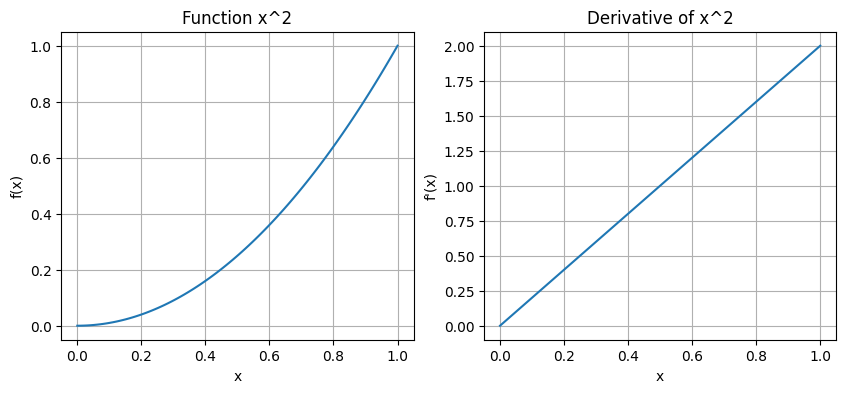

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def diff(f, x, h=1e-6):
    return (f(x + h) - f(x)) / h

x = np.linspace(0, 1, 100)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(x, f(x))
axs[1].plot(x, diff(f, x))

axs[0].set_ylabel('f(x)')
axs[1].set_ylabel("f'(x)")

axs[0].set_title("Function x^2")
axs[1].set_title("Derivative of x^2")

for ax in axs:
    ax.set_xlabel('x')
    ax.grid()

plt.show()

- Toks būdas nėra tinkamas, kuomet funkcija turi daug kintamųjų, o su empirinės rizikos funkcija būtent taip ir yra. 

- Gradientai yra apskaičiuojami taikant automatinio diferencijavimo (angl. autodiff) algoritmą.

### Automatinis diferencijavimas

- Automatinis diferencijavimas (AD) naudojamas apskaičiuoti kompiuteriu užrašomų funkcijų dalines išvestines. Metodo veikimas paremtas tuo, jog visi skaitiniai skaičiavimai gali būti suvesti į baigtinį skaičių elementarių operacijų, kurių išvestinės yra žinomos. Žinodami sudedamųjų operacijų išvestines bei pasinaudodami sudėtinės funkcijos diferencijavimo taisykle, galime tiksliai apskaičiuoti norimos funkcijos dalines išvestines pasirinktame taške. 

- AD atliekamas dviem etapais: pirmuoju etapu apskaičiuojamos visų sudedamųjų operacijų vertės, o antruoju etapu apskaičiuojamos išvestinės. Algoritmo veikimą pavaizduosime pavyzdžiu.

Nagrinėkime dviejų kintamųjų funkciją $f(x_1, x_2) = \frac{3}{1 + \text{e}^{-(2x_1 - 3x_2 + 2)}} - 1$ (*pastaba*: toks funkcijos pasirinkimas neatsitiktinis – atkreipkite dėmesį į neuroninio tinklo išraišką). Tuomet $f$ galime užrašyti kaip funkcijų $h_1: \mathbb{R}^2 \rightarrow \mathbb{R}, h_2: \mathbb{R} \rightarrow \mathbb{R}, h_3: \mathbb{R} \rightarrow \mathbb{R}$ kompoziciją, $f = h_3 \circ h_2 \circ h_1$, kur $h_1(x, y) = 2x - 3y + 2$, $h_2(x) = \frac{1}{1 + \text{e}^{-x}}$, $h_3(x) = 3x - 1$. Apskaičiuosime funkcijos $f$ dalines išvestines $\frac{\partial f}{\partial x_1}$, $\frac{\partial f}{\partial x_2}$ taške $(x_1, x_2) = (0.5, 1)$:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/backprop_example.png" alt="backprop-example" width="65%">
<p><strong>1.10 pav., Sklidimo atgal algoritmo pavyzdys </strong></p>
</div>

Galime pastebėti, kad atlikę vieną sklidimo į priekį ir vieną atgalinio sklidimo etapą, randame visas funkcijos $f:\mathbb{R}^d \rightarrow \mathbb{R}$ dalines išvestines, nepriklausomai nuo kintamųjų skaičiaus $d$, t.y. algoritmo skaičiavimo sudėtingumas priklauso tik nuo pačios funkcijos sudėtingumo. 

Sklidimo į priekį metu apskaičiuojamos vertės išsaugomos grafe (angl. computational graph); tuomet, sklidimo atgal metu išsaugomos dalinės išvestinės. Pabaigus vieną skaičiavimo ciklą bei skaičiuojant gradientus naujoje iteracijoje, būtina nunulinti gradientų reikšmes, nes kitaip jos kaupsis.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/computational_graph.png" alt="computational-graph" width="100%">
<p><strong>1.11 pav., Automatinio diferencijavimo grafas</strong></p>
</div>

## Praktinis taikymas su PyTorch

- Nuo šiol modeliams kurti naudosime PyTorch. Jis pasirūpins sklidimo atgal algoritmu ir automatiniu diferencijavimu, todėl mums tereiks apibrėžti neuroninio tinklo architektūrą!

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self, channels_in, channels_hidden, channels_out):
        super().__init__()
        self.fc1 = nn.Linear(channels_in, channels_hidden)
        self.fc2 = nn.Linear(channels_hidden, channels_out)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
x_seq = torch.linspace(-3, 3, 100).reshape(-1, 1)
y_seq = torch.sin(x_seq) + torch.randn(100, 1) * 0.25

model = Net(1, 2, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(model, criterion, optimizer, num_epochs=20):
    model.train()
    log_interval = num_epochs // 10
    
    for epoch in range(num_epochs):

        outputs = model(x_seq)
        loss = criterion(outputs, y_seq)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        avg_epoch_loss = loss.item()
        
        if not epoch % log_interval or epoch+1 == num_epochs:
            print(f'Epoch {epoch} loss {avg_epoch_loss:.04f}')
        
train(model, criterion, optimizer, num_epochs=500)

Epoch 0 loss 0.6421
Epoch 50 loss 0.4179
Epoch 100 loss 0.1913
Epoch 150 loss 0.1047
Epoch 200 loss 0.0977
Epoch 250 loss 0.0929
Epoch 300 loss 0.0889
Epoch 350 loss 0.0856
Epoch 400 loss 0.0829
Epoch 450 loss 0.0808
Epoch 499 loss 0.0791


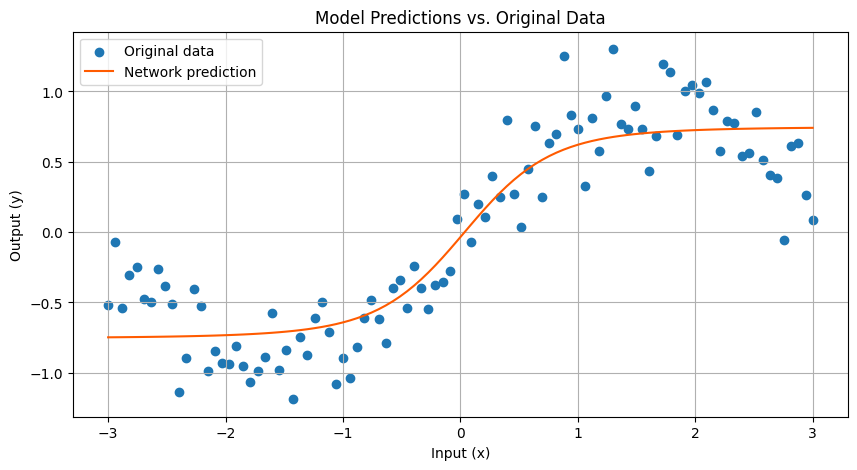

In [7]:
model.eval()
with torch.no_grad():
    predictions = model(x_seq)

plt.figure(figsize=(10, 5))
plt.scatter(x_seq.numpy(), y_seq.numpy(), label='Original data')
plt.plot(x_seq.numpy(), predictions.numpy(), color='#FF5B00', label='Network prediction')
plt.title('Model Predictions vs. Original Data')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.grid()
plt.show()

### Realus end-to-end pavyzdys

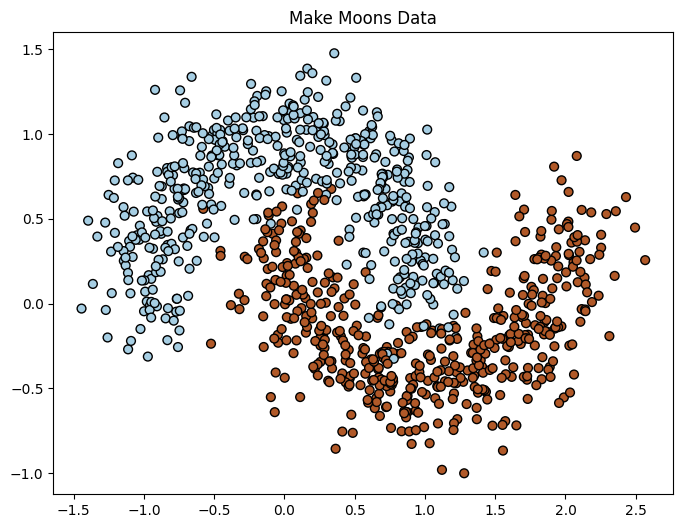

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=40)
plt.title("Make Moons Data")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

class MoonsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = MoonsDataset(X_train, y_train)
val_dataset = MoonsDataset(X_val, y_val)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)


In [10]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = 2
hidden_size = 16
output_size = 2
learning_rate = 0.001

model = Net(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
num_epochs = 100
train_losses, val_losses = [], []
log_interval = 10

for epoch in range(num_epochs):
    model.train()
    running_loss_train = running_loss_val = 0.0
    
    for inputs_train, labels_train in train_loader:

        outputs_train = model(inputs_train)
        loss_train = criterion(outputs_train, labels_train)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        running_loss_train += loss_train.item()
            
    train_losses.append(running_loss_train / len(train_loader))
    
    with torch.no_grad():
        model.eval()
        for inputs_val, labels_val in val_loader:
            outputs_val = model(inputs_val)
            loss_val = criterion(outputs_val, labels_val)
            
            running_loss_val += loss_val.item()
        
        val_losses.append(running_loss_val / len(val_loader))
    
    if not (epoch+1) % log_interval or epoch+1 == num_epochs:
        print(f"Epoch [{epoch+1}/{num_epochs}]; Train Loss: {train_losses[-1]:.4f}; Validation Loss: {val_losses[-1]:.4f}")

Epoch [10/100]; Train Loss: 0.3182; Validation Loss: 0.2968
Epoch [20/100]; Train Loss: 0.2224; Validation Loss: 0.1990
Epoch [30/100]; Train Loss: 0.1478; Validation Loss: 0.1299
Epoch [40/100]; Train Loss: 0.1075; Validation Loss: 0.0953
Epoch [50/100]; Train Loss: 0.0915; Validation Loss: 0.0812
Epoch [60/100]; Train Loss: 0.0829; Validation Loss: 0.0748
Epoch [70/100]; Train Loss: 0.0771; Validation Loss: 0.0701
Epoch [80/100]; Train Loss: 0.0739; Validation Loss: 0.0719
Epoch [90/100]; Train Loss: 0.0720; Validation Loss: 0.0633
Epoch [100/100]; Train Loss: 0.0704; Validation Loss: 0.0660


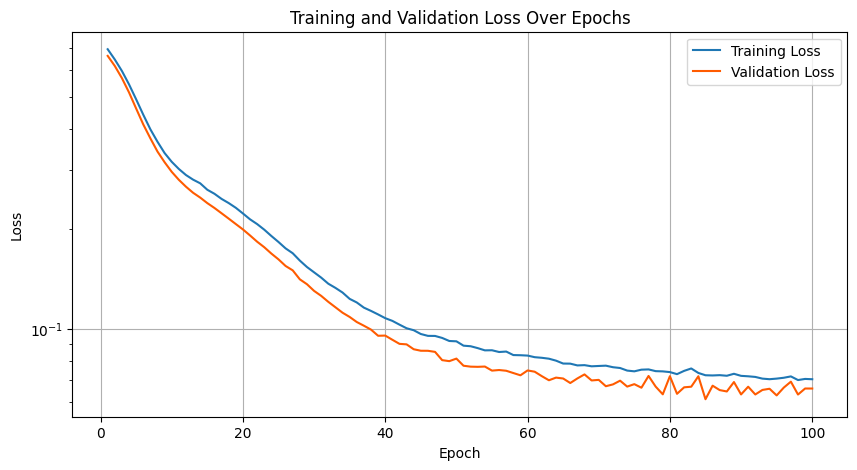

In [12]:
epochs = list(range(1, num_epochs + 1))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(epochs, train_losses, label='Training Loss')
ax.plot(epochs, val_losses, color='#FF5B00', label='Validation Loss')
ax.set_title('Training and Validation Loss Over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_yscale('log')
ax.legend()
ax.grid()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

model.eval()
all_preds = []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())


accuracy = accuracy_score(y_val, all_preds)
print(f'Final Validation Accuracy: {accuracy * 100:.2f}%')


Final Validation Accuracy: 97.67%


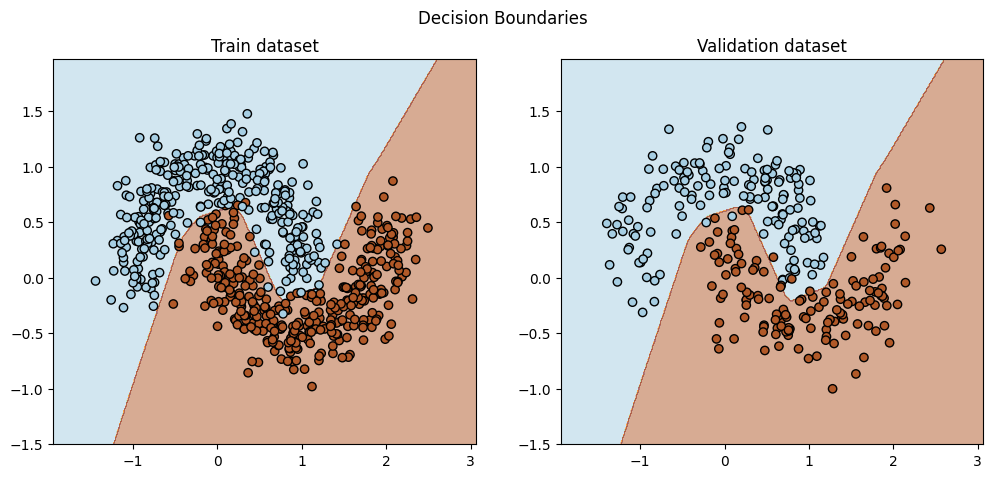

In [14]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

with torch.no_grad():
    Z = model(grid_tensor)
    _, Z = torch.max(Z, 1)
Z = Z.numpy().reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for ax in axs:
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)

axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
axs[0].set_title("Train dataset")

axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, edgecolors='k', cmap=plt.cm.Paired)
axs[1].set_title("Validation dataset")

plt.suptitle("Decision Boundaries")
plt.show()